In [32]:
import deepNN as dnn
import torch
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm, trange

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
a, b = 0, 1
N = 100

x = (b - a) * torch.rand(N, 1) + a
# def func(x): return torch.sin(np.pi*x) 
# def dfunc(x): return np.pi*torch.cos(np.pi*x) 
# def deltafunc(x): return np.pi**2*torch.sin(np.pi*x) 
def func(x): return x**(3./2) 
def dfunc(x): return 3./2*x**(1./2)
def deltafunc(x): return -3./4*x**(-1./2)



y = func(x) 


nn = dnn.ResNet(torch.tanh, 1, [20]*4, 1) 
nn.box_init()


n_epochs = 50
n_lsgd_it = 12

def loss(x, data, net):
    y_pred = net(x)
    return 1.0/len(data) * torch.sum((y_pred - data)**2)


nn.lsgd(n_epochs, n_lsgd_it, input_data=x, data=y, loss_fun=loss)



Main it 11, Loss 5.3e-14: 100%|██████████| 50/50 [00:00<00:00, 203.30it/s]


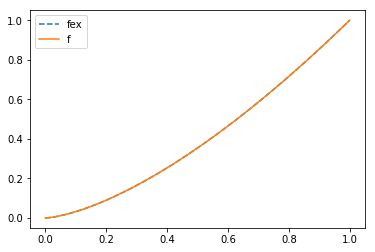

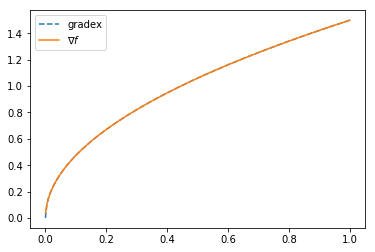

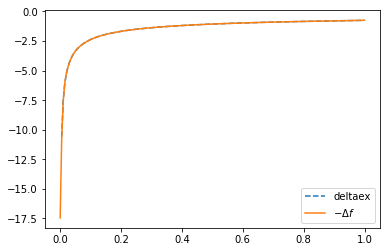

Report:
L2 error:9.599147878849714e-07
H1 semi-norm error:0.0025881126290681535


In [34]:
x = torch.linspace(0, 1, 200)
y = nn(x)
dy = nn.gradient(x)
deltay = nn.laplacian(x)

yex = func(x).detach().numpy()
dyex = dfunc(x).detach().numpy()
deltaex = deltafunc(x).detach().numpy()

x_np = x.detach().numpy()
 
    

plt.plot(x_np, yex, '--', label='fex')
plt.plot(x_np, y.detach().numpy(), label='f')
plt.legend()
plt.show()

plt.plot(x_np, dyex, '--', label='gradex')
plt.plot(x_np, dy.flatten().detach().numpy(), label=r"$\nabla f$")
plt.legend()
plt.show()

plt.plot(x_np, deltaex, '--', label='deltaex')
plt.plot(x_np, deltay.detach().numpy(), label=r"$-\Delta f$")
plt.legend()
plt.show()


print('Report:')
print('L2 error:' + str(np.linalg.norm(y.flatten().detach().numpy()  -  yex)/np.sqrt(len(x_np))))
print('H1 semi-norm error:' + str(np.linalg.norm(dy.flatten().detach().numpy() - dyex)/np.sqrt(len(x_np))))

# Basis functions
By plotting the output of the last hidden layer, we see that they are basically constant - but the output layer's weights are rather big.

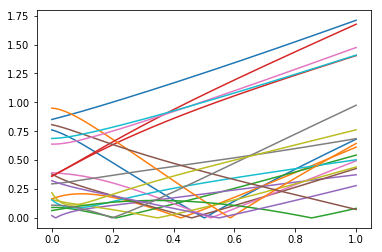

In [35]:
x = torch.linspace(0, 1, 300)

last_hidden_output = nn.output_layer(x, nn.L-1)
size_out = last_hidden_output.shape[1]

y = last_hidden_output@nn.output.weight.t()
x_np = x.detach().numpy()
out_np = last_hidden_output.detach().numpy()
plt.plot(x_np, np.abs(out_np))


In [36]:
nn.output.weight

Parameter containing:
tensor([[  -57297.3761,  -136443.4189,  -264378.3759, -1237352.6158,
           171831.8154,  -548522.4217,   171396.5545,   276329.8587,
           379518.5796,   -27111.5350,  -262135.8406,   -68048.8577,
          -140470.9707,  1325046.9647,    68130.0477,   186747.7058,
           -89717.6299,   -53734.0309,    26403.9242,   134543.4427]])